In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
"""查看数据""" 
import pandas as pd
titanic = pd.read_csv('train.csv')
# titanic.head(3)
print(titanic.describe())
print(titanic.info())

# 年龄数据缺失较多
# Sex、Embarked、Name等属性都是object类型，要将其转化为机器学习能处理的类型

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

In [3]:
"""数据预处理"""
# 用平均值填补缺失值
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

print(titanic['Sex'].unique())
# titanic.loc[0]表示第0行的样本
# titanic.loc[0, 'PassengerId']表示行为0，列为PassengerId的值
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

print(titanic['Embarked'].describe())
print(titanic['Embarked'].unique())
embark_count=titanic.groupby(['Embarked']).size()
print(embark_count)

['male' 'female']
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
['S' 'C' 'Q' nan]
Embarked
C    168
Q     77
S    644
dtype: int64


In [4]:

titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

**特征工程**

从给的数据里提炼出新的特征
提炼的3个新特征为FamilySize：SibSp和Parch的人数相加，看看是否家庭人数越多获救几率越大；NameLength：名字长度，外国名字越长地位越高；Title：在Name里提取的，类似Mr、Mrs、Dr表示性别职业
> 

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [6]:
# 提炼新特征
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['NameLength'] = titanic['Name'].apply(lambda x: len(x))
import re
import pandas as pd
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ''
titles = titanic['Name'].apply(get_title)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 8, "Mlle": 9,
                 "Mme": 10, "Don": 11, "Lady": 12, "Countess": 13, "Jonkheer": 14, "Sir": 15, "Capt": 16, "Ms": 17
                 }
for k, v in title_mapping.items():
    titles[titles == k] = v
print(pd.value_counts(titles))
titanic['Title'] = titles

1     517
2     182
3     125
4      40
5       7
6       6
8       2
7       2
9       2
16      1
10      1
11      1
12      1
13      1
14      1
15      1
17      1
Name: Name, dtype: int64


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,23,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,51,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,44,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,24,1


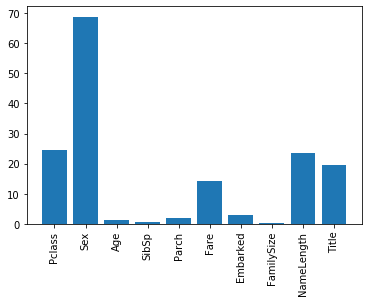

In [10]:
# 特征选择
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", 
"FamilySize", "NameLength", "Title"]
selector = SelectKBest(f_classif, k=5)# 方差分析，计算方差分析（ANOVA）的F值 (组间均方 / 组内均方)，选取前5个特征
selector.fit(titanic[predictors], titanic['Survived'])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

#发现“Pclass”、 "Sex"、“Fare”、"NameLength"和“Title”这5个特征比较重要

In [9]:
"""线性回归"""
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
# 选择特征
predictors = ['Pclass', 'Sex', 'Fare', 'NameLength','Title']
# 导入线性回归
alg = LinearRegression()
# 将样本分为3份进行交叉验证
kf = KFold(n_splits=3, random_state=1)
predictions = []
for train_index, test_index in kf.split(titanic):
#     print(test_index)
    # 用于训练的特征数据
    train_predictors = titanic[predictors].iloc[train_index, :]
    # 特征数据的label(即是否获救)
    train_target = titanic['Survived'].iloc[train_index]  # train_target = titanic['Survived'][train_index]
    # 训练线性回归模型
    alg.fit(train_predictors, train_target)    
    test_predictions = alg.predict(titanic[predictors].iloc[test_index, :])
    predictions.append(test_predictions)
# 线性回归得到的结果是在[0,1]，转化为类别
import numpy as np
#因为没有shuffle
predictions = np.concatenate(predictions, axis=0)# predictions = np.hstack(predictions)
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
# predictions = np.where(predictions > .5, 1, 0)
# 线性模型准确率
accuracy = sum(predictions == titanic['Survived']) / len(predictions)
print(accuracy)

0.7822671156004489


In [62]:
"""SVM"""
from sklearn.svm import SVC
# 选择特征
predictors = ['Pclass', 'Sex', 'Fare', 'NameLength','Title']
svm_clf = SVC()
kf = KFold(n_splits=3, random_state=1)
predictions = []
for train_index, test_index in kf.split(titanic):
    print(titanic[predictors].iloc[test_index, :])
    # 用于训练的特征数据
    train_predictors = titanic[predictors].iloc[train_index, :]
    # 特征数据的label(即是否获救)
    train_target = titanic['Survived'].iloc[train_index]  # train_target = titanic['Survived'][train_index]
    # 训练线性回归模型
    svm_clf.fit(train_predictors, train_target)    
    test_predictions = svm_clf.predict(titanic[predictors].iloc[test_index, :])
    predictions.append(test_predictions)
# 线性回归得到的结果是在[0,1]，转化为类别
import numpy as np
#因为没有shuffle
predictions = np.concatenate(predictions, axis=0)# predictions = np.hstack(predictions)
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
# predictions = np.where(predictions > .5, 1, 0)
# 线性模型准确率
accuracy = sum(predictions == titanic['Survived']) / len(predictions)
print(accuracy)

     Pclass  Sex      Fare  NameLength Title
0         3    0    7.2500          23     1
1         1    1   71.2833          51     3
2         3    1    7.9250          22     2
3         1    1   53.1000          44     3
4         3    0    8.0500          24     1
5         3    0    8.4583          16     1
6         1    0   51.8625          23     1
7         3    0   21.0750          30     4
8         3    1   11.1333          49     3
9         2    1   30.0708          35     3
10        3    1   16.7000          31     2
11        1    1   26.5500          24     2
12        3    0    8.0500          30     1
13        3    0   31.2750          27     1
14        3    1    7.8542          36     2
15        2    1   16.0000          32     3
16        3    0   29.1250          20     4
17        2    0   13.0000          28     1
18        3    1   18.0000          55     3
19        3    1    7.2250          23     3
20        2    0   26.0000          20     1
21        

C:\Users\Pluto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


     Pclass  Sex      Fare  NameLength Title
297       1    1  151.5500          28     2
298       1    0   30.5000          21     1
299       1    1  247.5208          47     3
300       3    1    7.7500          40     2
301       3    0   23.2500          18     1
302       3    0    0.0000          31     1
303       2    1   12.3500          19     2
304       3    0    8.0500          33     1
305       1    0  151.5500          30     4
306       1    1  110.8833          23     2
307       1    1  108.9000          82     3
308       2    0   24.0000          19     1
309       1    1   56.9292          30     2
310       1    1   83.1583          30     2
311       1    1  262.3750          26     2
312       2    1   26.0000          37     3
313       3    0    7.8958          22     1
314       2    0   26.2500          18     1
315       3    1    7.8542          31     2
316       2    1   26.0000          35     3
317       2    0   14.0000          20     5
318       

C:\Users\Pluto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


     Pclass  Sex      Fare  NameLength Title
594       2    0   26.0000          23     1
595       3    0   24.1500          27     1
596       2    1   33.0000          26     2
597       3    0    0.0000          19     1
598       3    0    7.2250          17     1
599       1    0   56.9292          44    15
600       2    1   27.0000          51     3
601       3    0    7.8958          20     1
602       1    0   42.4000          25     1
603       3    0    8.0500          25     1
604       1    0   26.5500          31     1
605       3    0   15.5500          29     1
606       3    0    7.8958          17     1
607       1    0   30.5000          27     1
608       2    1   41.5792          53     3
609       1    1  153.4625          25     2
610       3    1   31.2750          57     3
611       3    0    7.0500          21     1
612       3    1   15.5000          27     2
613       3    0    7.7500          16     1
614       3    0    8.0500          31     1
615       

C:\Users\Pluto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
"""随机森林"""
from sklearn.ensemble import RandomForestClassifier
# 选择特征
predictors = ['Pclass', 'Sex', 'Fare', 'NameLength','Title']
RFC = RandomForestClassifier()
kf = KFold(n_splits=3, random_state=1)
predictions = []
for train_index, test_index in kf.split(titanic):
#     print(test_index)
    # 用于训练的特征数据
    train_predictors = titanic[predictors].iloc[train_index, :]
    # 特征数据的label(即是否获救)
    train_target = titanic['Survived'].iloc[train_index]  # train_target = titanic['Survived'][train_index]
    # 训练线性回归模型
    RFC.fit(train_predictors, train_target)    
    test_predictions = RFC.predict(titanic[predictors].iloc[test_index, :])
    predictions.append(test_predictions)
# 线性回归得到的结果是在[0,1]，转化为类别
import numpy as np
#因为没有shuffle
predictions = np.concatenate(predictions, axis=0)# predictions = np.hstack(predictions)
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
# predictions = np.where(predictions > .5, 1, 0)
# 线性模型准确率
accuracy = sum(predictions == titanic['Survived']) / len(predictions)
print(accuracy)

C:\Users\Pluto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7856341189674523


In [13]:
print(predictions)

[0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 1 0 0 1 

In [112]:
test = pd.read_csv('test.csv')
print(test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [113]:
# 提炼新特征
test['FamilySize'] = test['SibSp'] + test['Parch']
test['NameLength'] = test['Name'].apply(lambda x: len(x))
import re
import pandas as pd
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ''
titles = test['Name'].apply(get_title)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 8, "Mlle": 9,
                 "Mme": 10, "Don": 11, "Lady": 12, "Countess": 13, "Jonkheer": 14, "Sir": 15, "Capt": 16, "Ms": 17
                 }

for k, v in title_mapping.items():
    titles[titles == k] = v
print(pd.value_counts(titles))
test['Title'] = titles

1     240
2      79
3      72
4      21
8       2
6       2
17      1
5       1
Name: Name, dtype: int64


In [114]:

"""数据预处理"""
# 用平均值填补缺失值
test['Age'] = test['Age'].fillna(test['Age'].mean())

print(test['Sex'].unique())
# titanic.loc[0]表示第0行的样本
# titanic.loc[0, 'PassengerId']表示行为0，列为PassengerId的值
test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1

print(test['Embarked'].describe())
print(test['Embarked'].unique())
embark_count=test.groupby(['Embarked']).size()
print(embark_count)


test['Embarked'] = test['Embarked'].fillna('S')
test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2

print(test['Embarked'].describe())
print(test['Embarked'].unique())

['male' 'female']
count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object
['Q' 'S' 'C']
Embarked
C    102
Q     46
S    270
dtype: int64
count    418.000000
mean       0.464115
std        0.685516
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64
[2 0 1]


In [111]:
predictors = ['Pclass', 'Sex', 'Fare', 'NameLength','Title']
pd.set_option('max_row',500)
test_predictions = RFC.predict(test[predictors].iloc[:, :])
# print(test[predictors].iloc[:, :])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').